In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
from scipy import ndimage

Angle of the axis of minimum inertia: 358.13 degrees


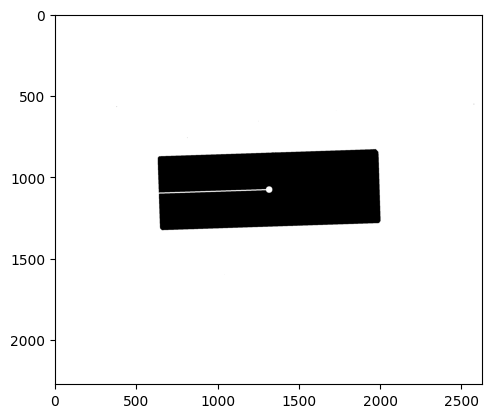

In [2]:
# Own method to get angle and axis

# Get contour
img = cv2.imread(r"C:\Users\gokulr\Downloads\slipgauge_test.png", 0)
ret, thresh = cv2.threshold(cv2.bitwise_not(img), 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
largest = max(contours, key=lambda x: cv2.contourArea(x))

# COM
M = cv2.moments(largest)
cx = M['m10']/M['m00']
cy = M['m01']/M['m00']
com = (int(cx),int(cy))

# Second order moment and angle of axis
mu20 = M['mu20'] / M['m00']
mu02 = M['mu02'] / M['m00']
mu11 = M['mu11'] / M['m00']
theta_rad = 0.5 * math.atan2(2 * mu11, mu20 - mu02)
theta_deg = math.degrees(theta_rad)
if theta_deg < 0:
    theta_deg += 360
print(f"Angle of the axis of minimum inertia: {theta_deg:.2f} degrees")

# Draw axis
b = com[0]
h = b*np.tan(theta_rad)
pt1 = (0, int(com[1]-h))
pt2 = com
com_plot = cv2.bitwise_not(cv2.circle(thresh, com, 20, 0, -1))
line_plot = cv2.line(com_plot, pt1, pt2, 255, 5)
plt.imshow(line_plot, cmap='gray')

In [3]:
# ChatGPT SciPy method which gets eigenvector

labeled_image, num_labels = ndimage.label(thresh)

# Get coordinates of all non-zero pixels (foreground)
coords = np.column_stack(np.where(labeled_image > 0))

# Compute the centroid (center of mass) of the object
centroid = np.mean(coords, axis=0)

# Shift the coordinates to the centroid
coords_shifted = coords - centroid

# Compute the covariance matrix (second-order moments)
cov_matrix = np.cov(coords_shifted.T)

# Perform eigenvalue decomposition to get the principal axes
eigvals, eigvecs = np.linalg.eigh(cov_matrix)

# The eigenvector with the smallest eigenvalue corresponds to the axis of minimum second-order moment
min_eigenvector = eigvecs[:, np.argmin(eigvals)]

# Print the result
print("Axis of minimum second-order moment:", min_eigenvector)

Axis of minimum second-order moment: [-0.99946946 -0.03257005]


In [4]:
# ChatGPT OpenCV which gets eigenvector

# Load the binary image
# image = cv2.imread('binary_image.png', cv2.IMREAD_GRAYSCALE)

# Find contours of the object
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Assume the largest contour is the object
cnt = max(contours, key=cv2.contourArea)

# Get the coordinates of the contour
points = cnt.reshape(-1, 2)

# Compute the centroid (center of mass)
M = cv2.moments(cnt)
cx = M['m10'] / M['m00']
cy = M['m01'] / M['m00']

# Shift the points to the centroid
points_shifted = points - [cx, cy]

# Compute the covariance matrix (second-order moments)
cov_matrix = np.cov(points_shifted.T)

# Perform eigenvalue decomposition
eigvals, eigvecs = np.linalg.eigh(cov_matrix)

# The eigenvector with the smallest eigenvalue corresponds to the axis of minimum inertia
min_eigenvector = eigvecs[:, np.argmin(eigvals)]

# min_eigenvector gives you the direction of the axis with minimum second-order moment
print("Axis of minimum second-order moment:", min_eigenvector)

Axis of minimum second-order moment: [-0.01457208 -0.99989382]


In [5]:
# TIMING
from time import time

In [6]:
# Own with 1000 iterations
t1 = time()
for x in range(1000):
    M = cv2.moments(largest)
    cx = M['m10']/M['m00']
    cy = M['m01']/M['m00']
    com = (int(cx),int(cy))
    mu20 = M['mu20'] / M['m00']
    mu02 = M['mu02'] / M['m00']
    mu11 = M['mu11'] / M['m00']
    theta_rad = 0.5 * math.atan2(2 * mu11, mu20 - mu02)
    theta_deg = math.degrees(theta_rad)
    if theta_deg < 0:
        theta_deg += 360
    t2 = time()
print(t2-t1)

0.08625578880310059


In [7]:
# Scipy eigenvector with only 100 iterations - Very slow 
t1 = time()
for x in range(100):
    labeled_image, num_labels = ndimage.label(thresh)
    coords = np.column_stack(np.where(labeled_image > 0))
    centroid = np.mean(coords, axis=0)
    coords_shifted = coords - centroid
    cov_matrix = np.cov(coords_shifted.T)
    eigvals, eigvecs = np.linalg.eigh(cov_matrix)
    min_eigenvector = eigvecs[:, np.argmin(eigvals)]
t2 = time()
print(t2-t1)

16.417715072631836


In [8]:
# OpenCV eigenvector
t1 = time()
for x in range(1000):
    points = largest.reshape(-1, 2)
    M = cv2.moments(cnt)
    cx = M['m10'] / M['m00']
    cy = M['m01'] / M['m00']
    points_shifted = points - [cx, cy]
    cov_matrix = np.cov(points_shifted.T)
    eigvals, eigvecs = np.linalg.eigh(cov_matrix)
    min_eigenvector = eigvecs[:, np.argmin(eigvals)]
    t2 = time()
print(t2-t1)

0.3492133617401123
